Leer Texto de imagenes

In [ ]:
import pytesseract
import cv2
import csv
import matplotlib.pyplot as plt
import numpy as np

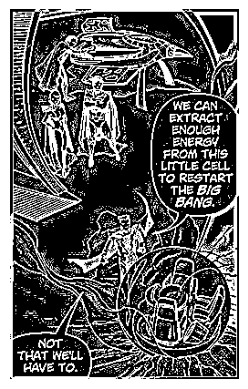

En la imagen se ha encontrado:  CANS
EXTRACT
ENOUGH
ENERGY

FROM THIS
UITLE CELL


Texto reconocido guardado en data\output\output_text\output_text_tesseract.csv


In [107]:
# Configura Tesseract para reconocimiento de texto en inglés
pytesseract.pytesseract.tesseract_cmd = r'E:\TESSERACT\tesseract.exe'

# Carga la imagen del cómic
image_path = 'data\output\divide_images\panel_3.jpg'
image = cv2.imread(image_path)

# Preprocesamiento de la imagen
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Unsharp Masking para mejorar la nitidez
unsharp_image = cv2.GaussianBlur(gray_image, (0, 0), 3)
unsharp_image = cv2.addWeighted(gray_image, 1.5, unsharp_image, -0.5, 0)

# Binarización adaptativa para obtener una mejor separación entre el texto y el fondo
binary_image = cv2.adaptiveThreshold(unsharp_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

# Configura los parámetros de Tesseract para cómics
custom_config = r'--oem 1 --psm 3'

# Realiza el reconocimiento de texto en la imagen preprocesada
text = pytesseract.image_to_string(binary_image, lang='eng', config=custom_config)

# Muestra la imagen
rgb_image = cv2.cvtColor(binary_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)
plt.axis('off')
plt.show()

# Texto que se ha encontrado
print("En la imagen se ha encontrado: ", text)

# Guarda el texto reconocido en un archivo CSV
output_csv = 'data\output\output_text\output_text_tesseract.csv'
with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow([text])

print("Texto reconocido guardado en", output_csv)
